## Predykcja opadów atmosferycznych
W tej ramce danych zajmiemy się próbą predykcji opadów atmosferycznych dla dnia następnego.
Operować będę na ramce danych udostępnionej pod następującym adresem: https://www.kaggle.com/jsphyg/weather-dataset-rattle-package?select=weatherAUS.csv

Zacznijmy klasycznie od wgrania wszystkich potrzebnych bibliotek oraz załadowania ramki danych.

In [4]:
import numpy as np
import pandas as pd
import keras
import seaborn as sns
from matplotlib import pyplot as plt

df_AU = pd.read_csv("australia.csv")

In [5]:
#Ostrzeżenia dotyczące pakietów, nie przejmujmy się nimi :D
import warnings
warnings.filterwarnings("ignore")

Zobaczmy jak prezentuje się nasza ramka danych, pierw w wersji "surowej":

In [3]:
df_AU.head(5)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     17.9     35.2       0.0         12.0      12.3           48.0   
1     18.4     28.9       0.0         14.8      13.0           37.0   
2     19.4     37.6       0.0         10.8      10.6           46.0   
3     21.9     38.4       0.0         11.4      12.2           31.0   
4     24.2     41.0       0.0         11.2       8.4           35.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0           6.0          20.0         20.0         13.0       1006.3   
1          19.0          19.0         30.0          8.0       1012.9   
2          30.0          15.0         42.0         22.0       1012.3   
3           6.0           6.0         37.0         22.0       1012.7   
4          17.0          13.0         19.0         15.0       1010.7   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  RainTomorrow  
0       1004.4       2.0       5.0     26.6     33.4          0             0  
1       1012.1       1.0       1.0     20.3     27.0          0             0  
2       1009.2       1.0       6.0     28.7     34.9          0             0  
3       1009.1       1.0       5.0     29.1     35.6          0             0  
4       1007.4       1.0       6.0     33.6     37.6          0             0

In [4]:
#Sprawdźmy czy nie zostaliśmy okłamani z brakiem danych
df_AU.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustSpeed  56420 non-null  float64
 6   WindSpeed9am   56420 non-null  float64
 7   WindSpeed3pm   56420 non-null  float64
 8   Humidity9am    56420 non-null  float64
 9   Humidity3pm    56420 non-null  float64
 10  Pressure9am    56420 non-null  float64
 11  Pressure3pm    56420 non-null  float64
 12  Cloud9am       56420 non-null  float64
 13  Cloud3pm       56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  RainToday      56420 non-null  int64  
 17  RainTomorrow   56420 non-null  int64  
dtypes: flo

Wspaniałe więści! Wszystkie dane są na miejscu, co więcej wszysktie dane są danymi ciągłymi, co dość ułatwi nam analizę. Jak widzimy nasza ramka posiada 56420 wierszy, jest to informacja newralgiczna przy wyborze zbiorów treningowego i testowego.

In [11]:
df_AU.shape

(56420, 18)

Zanim przejdę do operacji na naszej ramce danych, choć zostało to już dokonane przez prowadzącego w poleceniu zadania, prztocze ze względów dostępności do informacji, informacje a propos każdej z kolumn naszego zbioru danych:

MinTemp - Minimalna temperatura [C]  
MaxTemp - Maksymalna temperatura [C]  
Rainfall - Suma opadów [mm]  
Evaporation - Miara odparowywania [mm]  
Sunshine - Suma czasu nasłonecznienia [h]  
WindGustSpeed - Najwyższa prędkość wiatru [km/h]  
WindSpeed9am - Prędkość wiatru o 9:00 [km/h]  
WindSpeed3pm - Prędkość wiatru o 15:00 [km/h]  
Humidity9am - Wilgotność o 9:00 [%]  
Humidity3pm - Wilgotność o 15:00 [%]  
Pressure9am - Ciśnienie atmosferyczne o 9:00 [hPa]  
Pressure3pm - Ciśnienie atmosferyczne o 15:00 [hPa]  
Cloud9am - Zachmurzenie o 9:00 [skala: 0 - słońce, 8 - całkowite zachmurzenie]  
Cloud3pm - Zachmurzenie o 15:00 [skala: 0 - słońce, 8 - całkowite zachmurzenie]  
Temp9am - Temperatura o 9:00 [C]  
Temp3pm - Temperatura o 15:00 [C]  
RainToday - Czy dzisiaj padał deszcz [0 - nie, 1 - tak]  
Zmienna celu: RainTomorrow - Czy jutro będzie padał deszcz [0 - nie, 1 - tak]  

Zacznijmy pierw od streszczonej eksploracji danych by zapoznać się potencjalnymi zależnościami.

array([[<AxesSubplot:title={'center':'MinTemp'}>,
        <AxesSubplot:title={'center':'MaxTemp'}>,
        <AxesSubplot:title={'center':'Rainfall'}>,
        <AxesSubplot:title={'center':'Evaporation'}>],
       [<AxesSubplot:title={'center':'Sunshine'}>,
        <AxesSubplot:title={'center':'WindGustSpeed'}>,
        <AxesSubplot:title={'center':'WindSpeed9am'}>,
        <AxesSubplot:title={'center':'WindSpeed3pm'}>],
       [<AxesSubplot:title={'center':'Humidity9am'}>,
        <AxesSubplot:title={'center':'Humidity3pm'}>,
        <AxesSubplot:title={'center':'Pressure9am'}>,
        <AxesSubplot:title={'center':'Pressure3pm'}>],
       [<AxesSubplot:title={'center':'Cloud9am'}>,
        <AxesSubplot:title={'center':'Cloud3pm'}>,
        <AxesSubplot:title={'center':'Temp9am'}>,
        <AxesSubplot:title={'center':'Temp3pm'}>],
       [<AxesSubplot:title={'center':'RainToday'}>,
        <AxesSubplot:title={'center':'RainTomorrow'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=o

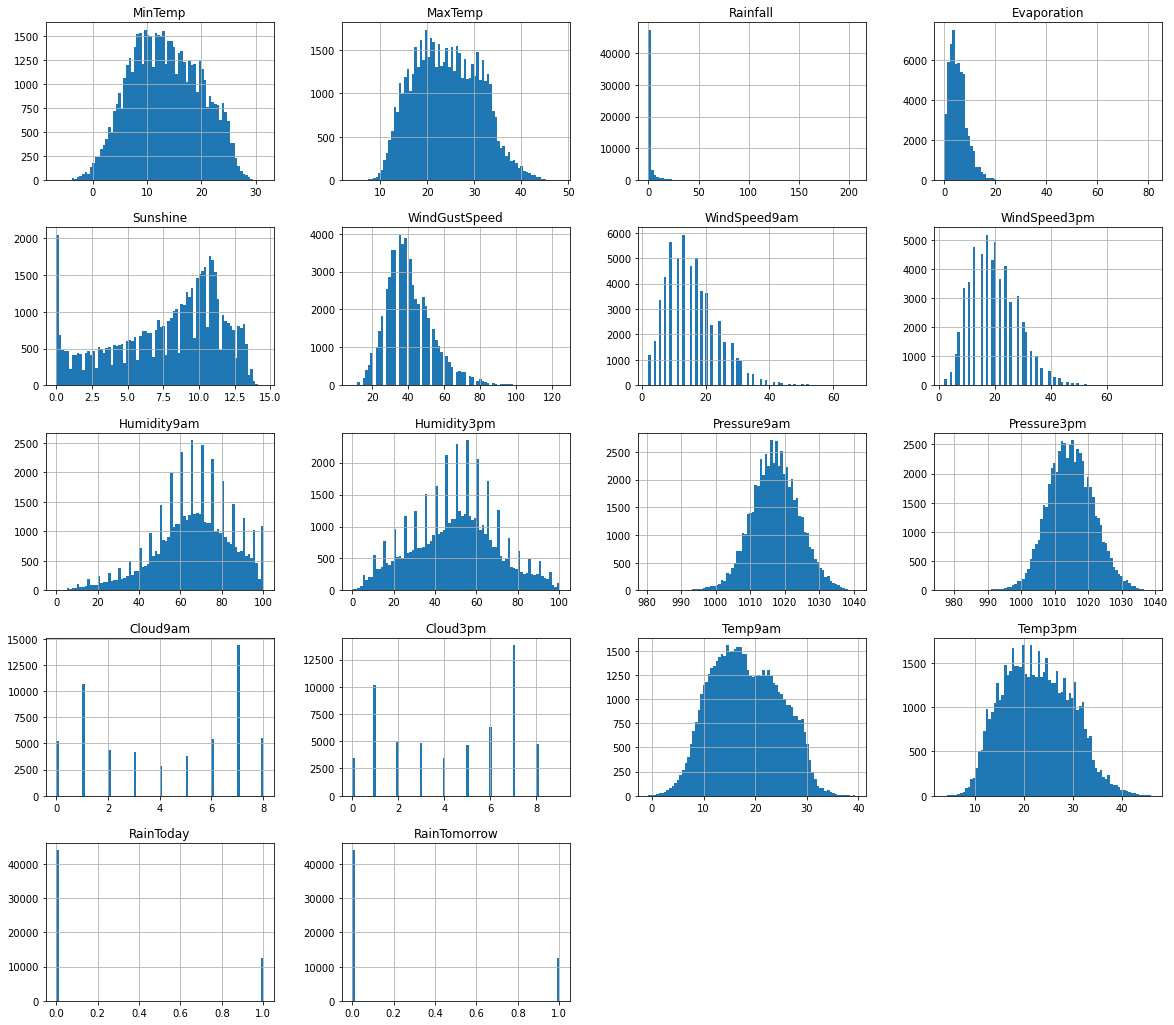

In [16]:
df_AU.hist(bins = 80,figsize = (20,18))

Widzimy, że rozkłady są w większoci przypadków rozkładami Gaussa, dla zmiennych ciągłych, jednakże obserwujemy także pewne nietypowe "anomalie" w niektórych rozkładach, jak na przykład dla rozkładu zmiennej wilgotności, gdzie niekóre z wartości są bardzo nietpowo liczniejsze niż inne.  
Ok, przyjrzyjmy się pairplotom i na ich podstawie wywnioskujmy, które zmienne są ze sobą skorelowane.

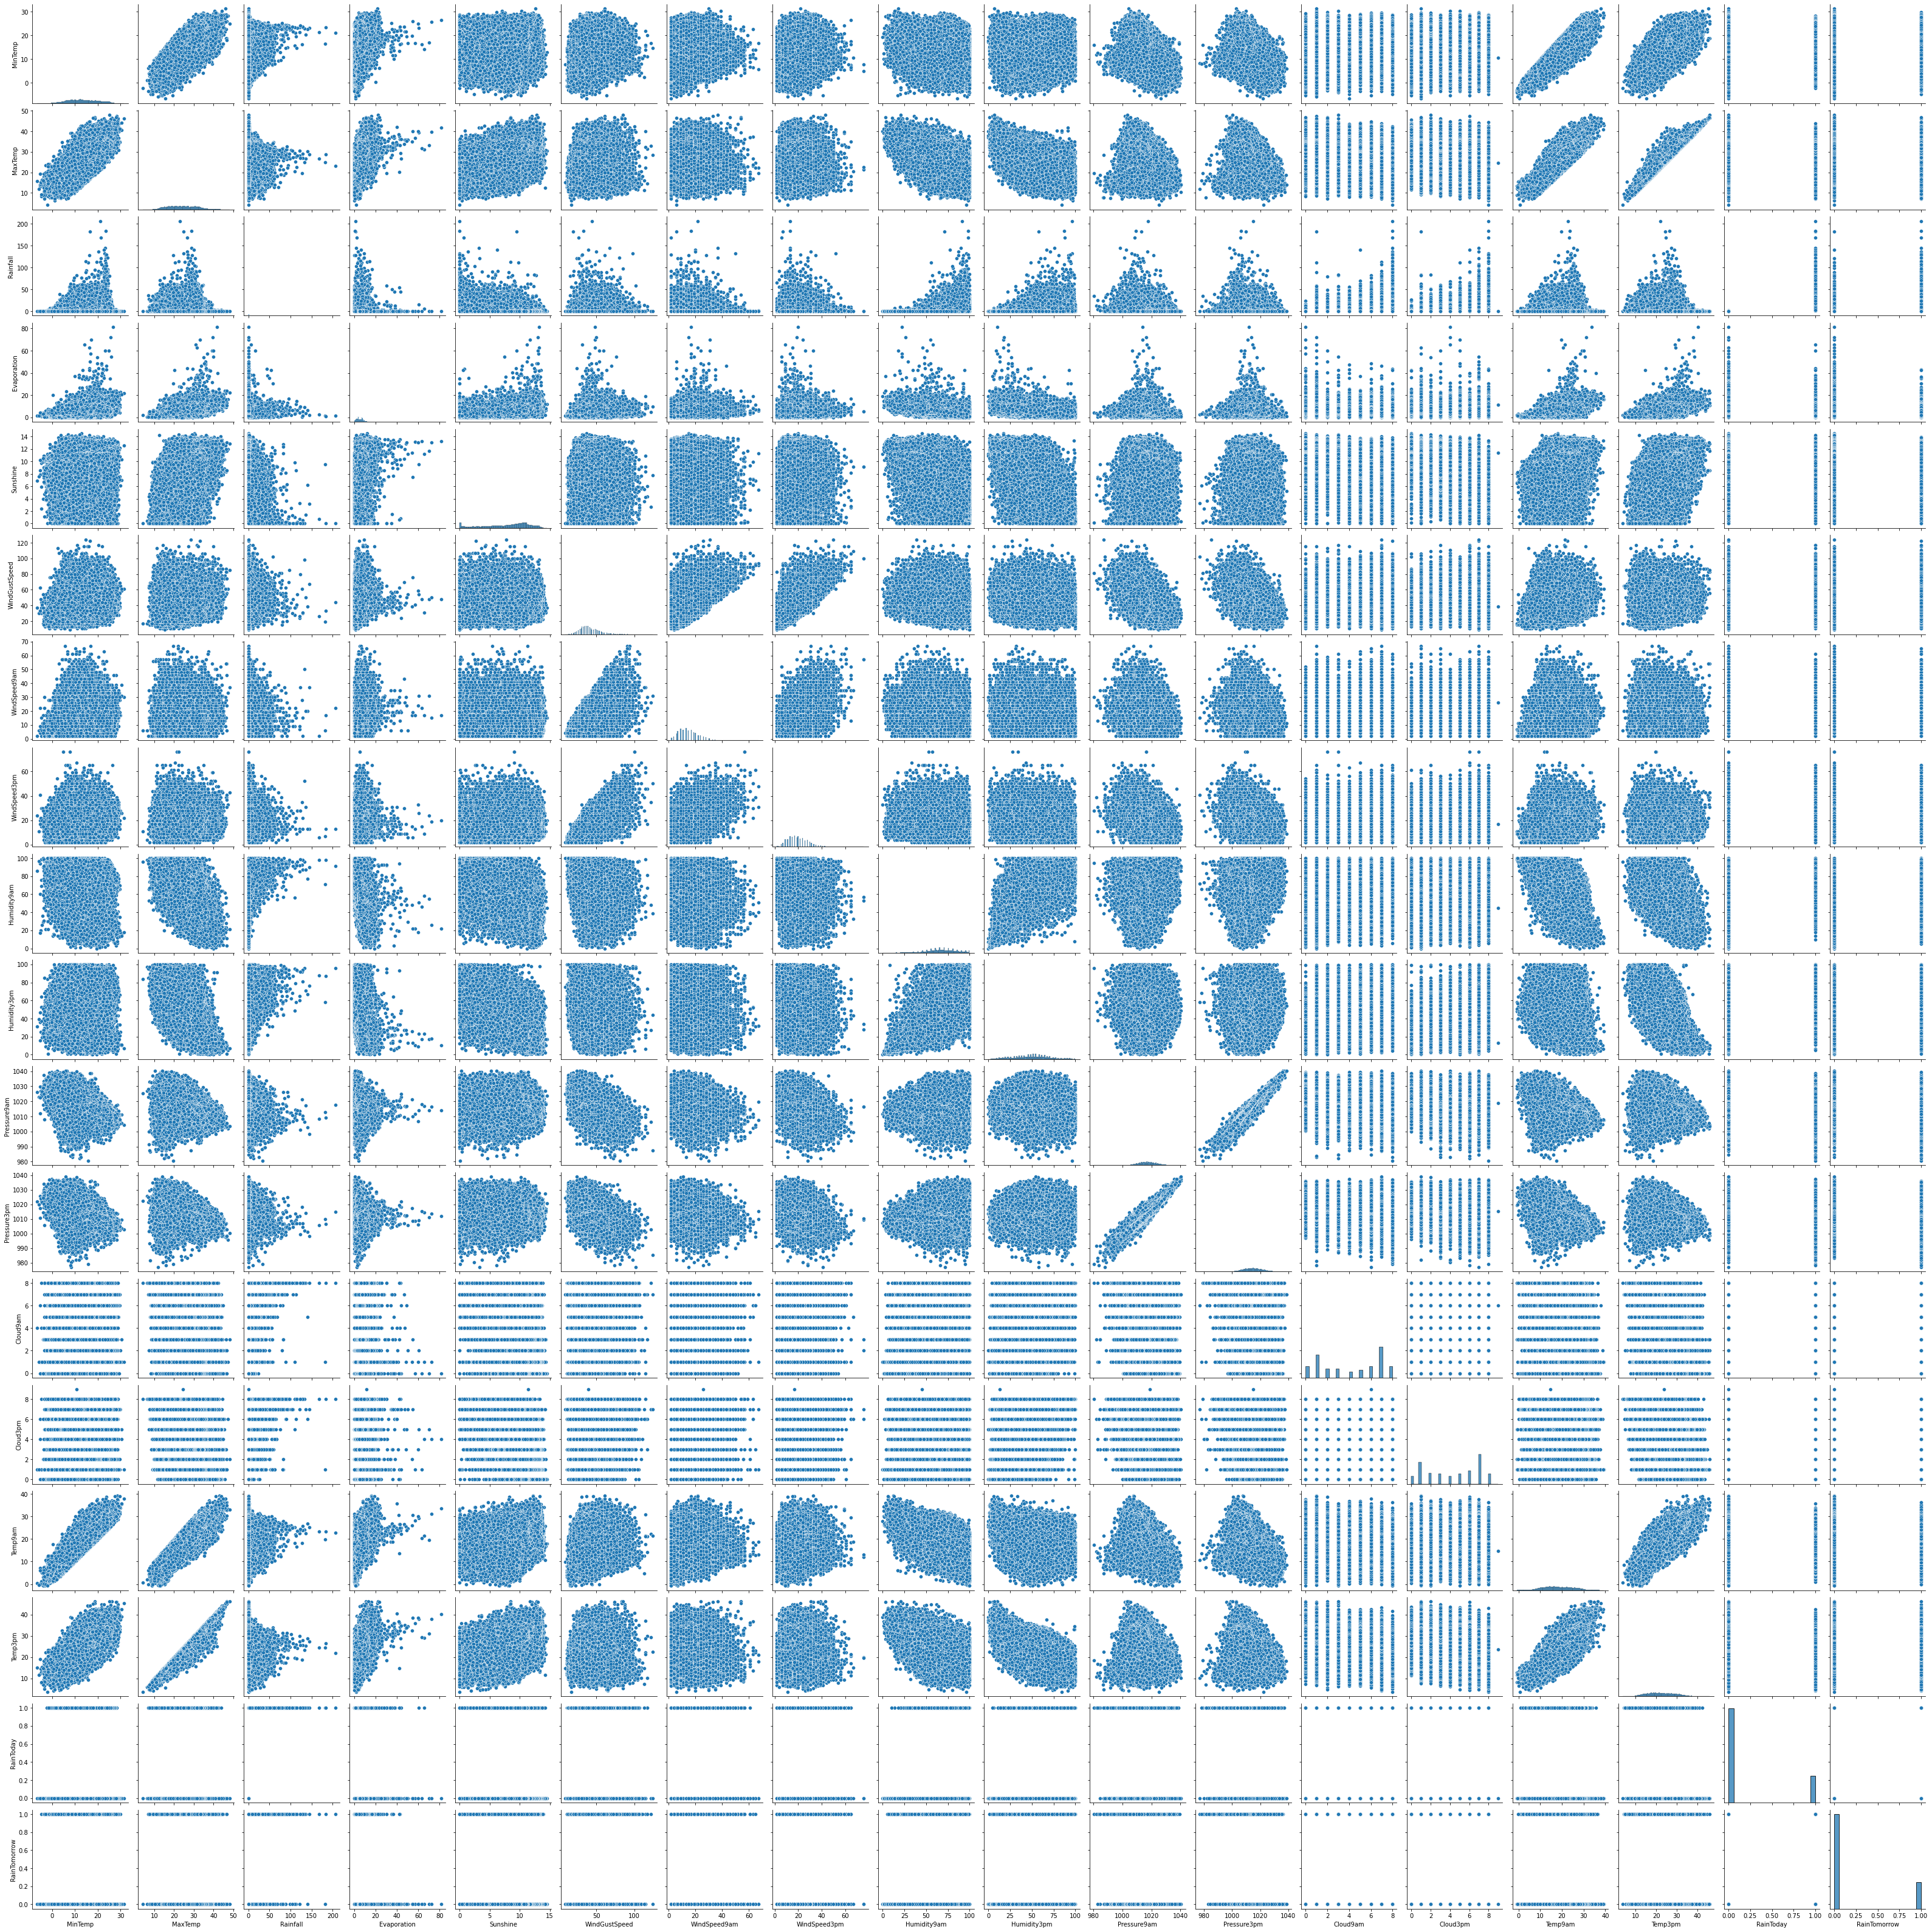

In [18]:
sns.pairplot(df_AU)

Tak, wiem, jest to całkowicie nieczytelne dla jednostki ludzkiej, zatem wybierzmy te wykresy, które demonstrują w czysty sposób pewną zależność.

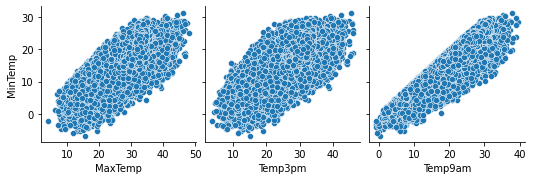

In [31]:
sns.pairplot(df_AU,y_vars = 'MinTemp', x_vars = df_AU[['MaxTemp','Temp3pm','Temp9am']])

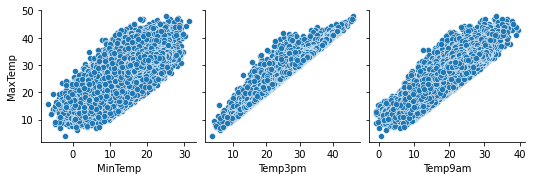

In [32]:
sns.pairplot(df_AU,y_vars = 'MaxTemp', x_vars = df_AU[['MinTemp','Temp3pm','Temp9am']])

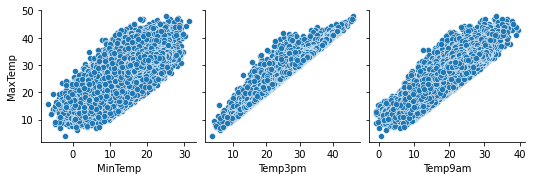

In [5]:
sns.pairplot(df_AU,y_vars = 'MaxTemp', x_vars = df_AU[['MinTemp','Temp3pm','Temp9am']])

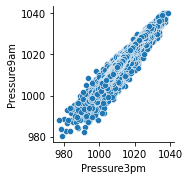

In [13]:
sns.pairplot(df_AU,y_vars = 'Pressure9am', x_vars = df_AU[['Pressure3pm']])

Na końcu utworzmy mapę korelacji by streścić nasze zależności:

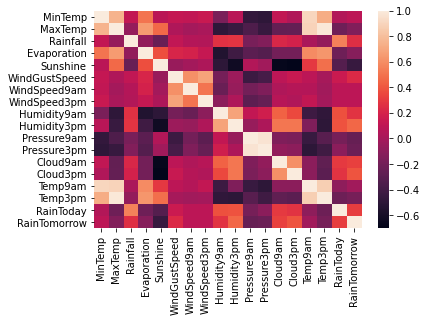

In [37]:
Korelacja = df_AU.corr()
sns.heatmap(Korelacja,annot = False)
plt.show()

## "Przycinanie" ramki, wstępne podejście do modelowania
Zanim przejdziemy do wyboru modeli uczenia maszynowego oraz ich nauki, zacznijmy od obróbki naszej ramki danych w celu ułatwienia modelom operacji na niej.  
Jak już wiemy, nasza ramka nie zawiera wartości kategorycznych, a zatem w obróbce ramki zaoszczędzi nam to na treści. To samo tyczy się wartości 'null' i 'NaN', które w tabeli nie występują.  
Wybrane modele wykorzystam na dwóch ramkach, na "czystej" oraz na obrobionej, będzie to zarazem test inżynieri cech, sprawdzający czy faktycznie operacje na ramce przyspieszyły, bądź nawet zmieniły (w zamyśle na lepsze) wyniki modelów.

### Outliery
Zacznijmy od wyleminowania, niektórych outlierów. Wierszów z outlierami pozbędziemy się jedynie z "najbardziej skrajnych" kolumn, iż, jak wiemy, wartości skrajne zaburzają pracę modelu machine learningowego, jednakże dla tabelki 18-kolumnowej, w najgorszym przypdaku, moglibyśmy się pozbyć nawet 80% danych początkowych, co z pewnością nie usprawniłoby żadnego modelu.


Patrząc na histogramy naszych cech, w oczy rzuca się kilka kolumn. Mianowicie "Sunshine", "Evaporation" oraz "Rainfall", jednakże ze względu na występowanie dość znaczącej ilości wartości odstających, w szczególności outlierów minimalnych, może to przechowywać pewne infromacje dotyczące zachodzącego zjawiska, dlatego zdecydowałem się o usunięcie jedynie maksymalnych outlierów dla tych dwóch kolumn.

Rzućmy okiem na boxploty reprezentujące wyżej omawiane zmienne.

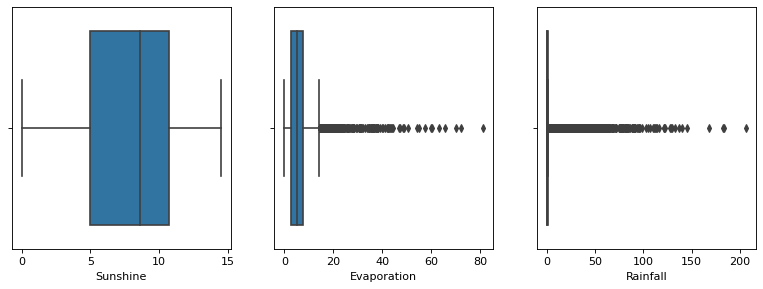

In [33]:
plt.figure(figsize=(12, 4), dpi=80)
plt.subplot(131)
sns.boxplot(df_AU['Sunshine'])
plt.subplot(132)
sns.boxplot(df_AU['Evaporation'])
plt.subplot(133)
sns.boxplot(df_AU['Rainfall'])
plt.show()

Jak widzimy, Evaporation oraz Rainfall są wręcz praktycznie outlierami maksymalnymi.  
Na poniższych wynikach, widać, że usunięcie kolumny "Rainfall" z naszej analizy może być uzasadnione, iż około 65% wartości okupuje wartość 0, a 85% pierwsze cztery wartości, które nie różnią się od siebie znacząco. 

In [49]:
print(df_AU['Rainfall'].value_counts()[0])
print(df_AU['Rainfall'].value_counts()[0:3].sum())
print(df_AU['Rainfall'].value_counts().sum())

36709
48132
56420


In [40]:
#Stwórzmy kopie naszej "ramki" i przytnijmy ją
df_prep = df_AU.copy()
df_prep = df_prep.drop(['Rainfall'],axis = 1)

upper_lim = df_prep['Evaporation'].quantile(.90)
#Stosuje mniejsze przycinanie, ze względu na mniejszą ilość outlierów w tym przypadku
upper_lim_1 = df_prep['Sunshine'].quantile(.95)

df_prep = df_prep[(df_prep['Evaporation'] < upper_lim)]
df_prep = df_prep[(df_prep['Sunshine'] < upper_lim_1)]

Z outlierów maksymalnych przytnę jeszcze 5% maksymalnych wartości z kolumn "WindSpeed9am" oraz "WindSpeed3pm". Wybrałem, outliery maksymalne ze względu na "interpretację" oraz rozkład danych zmiennych. Jak wiemy stan braku wiatru jest o wiele częstszy niż występowanie dość szybkiego oraz porwistego wiatru, zatem z tych dwóch kolumn pozbędę się, jak już wspomniałem, tylko po 5% outlierów maksymalnych. 

In [41]:
upper_lim_2 = df_prep['WindSpeed9am'].quantile(.95)
upper_lim_3 = df_prep['WindSpeed3pm'].quantile(.95)

df_prep = df_prep[(df_prep['WindSpeed9am'] < upper_lim_2)]
df_prep = df_prep[(df_prep['WindSpeed3pm'] < upper_lim_3)]

In [47]:
#Ile danych nam pozostało?
df_prep.shape

(44238, 17)

## Skalowanie
Zastosujmy dla naszego modelu skalowanie. Jak wiemy niektóre algorytmy uczenia maszynowego radzą sobie "niedobrze" z danymi o różnej skali wielkości, tudzież mogą nastąpić problemy ze zbieżnością w np. gradient descencie. Jak wiemy istnieje kilka sposobów radzenia sobie z powyższym problemem. Jak wiemy istnieją dwa główne idee skalowania danych: standaryzajca i normalizacja. W tej analizie zastosuje normalizacje, gdyż sprawdza się lepiej dla różnych rozkładów, podczas gdy standaryzacja jest najbardziej optymalna dla rozkładów Gaussa.

In [42]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler()

In [43]:
df_prep[:] = scaling.fit_transform(df_prep[:])

In [45]:
#Od razu lepiej
df_prep

MinTemp   MaxTemp  Evaporation  Sunshine  WindGustSpeed  WindSpeed9am  \
6      0.824176  0.706856     0.970297  0.992126           0.32      0.576923   
20     0.782967  0.628842     0.792079  0.464567           0.47      0.846154   
21     0.741758  0.754137     0.811881  0.826772           0.85      0.423077   
22     0.791209  0.723404     0.851485  0.976378           0.41      0.346154   
41     0.582418  0.614657     0.950495  0.787402           0.28      0.269231   
...         ...       ...          ...       ...            ...           ...   
56415  0.714286  0.692671     0.594059  0.866142           0.26      0.269231   
56416  0.766484  0.673759     0.752475  0.677165           0.28      0.423077   
56417  0.752747  0.678487     0.554455  0.866142           0.24      0.576923   
56418  0.719780  0.654846     0.613861  0.834646           0.17      0.269231   
56419  0.739011  0.652482     0.554455  0.842520           0.21      0.500000   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
6          0.548387     0.323232     0.141414     0.493913     0.522241   
20         0.548387     0.707071     0.626263     0.446957     0.461285   
21         0.161290     0.888889     0.494949     0.446957     0.469522   
22         0.419355     0.454545     0.222222     0.446957     0.495881   
41         0.354839     0.434343     0.242424     0.526957     0.523888   
...             ...          ...          ...          ...          ...   
56415      0.580645     0.626263     0.313131     0.539130     0.532125   
56416      0.290323     0.555556     0.272727     0.551304     0.543657   
56417      0.290323     0.454545     0.222222     0.563478     0.553542   
56418      0.483871     0.616162     0.575758     0.556522     0.535420   
56419      0.161290     0.727273     0.313131     0.539130     0.518946   

       Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  RainTomorrow  
6         0.375     0.125  0.685333  0.674757        0.0           0.0  
20        0.875     0.875  0.669333  0.572816        0.0           1.0  
21        0.875     0.500  0.677333  0.720874        1.0           1.0  
22        0.250     0.750  0.768000  0.716019        1.0           0.0  
41        0.750     0.750  0.482667  0.599515        0.0           0.0  
...         ...       ...       ...       ...        ...           ...  
56415     0.000     0.125  0.672000  0.694175        0.0           0.0  
56416     0.875     0.000  0.680000  0.686893        0.0           0.0  
56417     0.000     0.000  0.680000  0.689320        0.0           0.0  
56418     0.125     0.125  0.680000  0.618932        0.0           0.0  
56419     0.750     0.625  0.696000  0.662621        0.0           0.0  

[44238 rows x 17 columns]

## Przygotowanie zbiorów treningowych oraz testowy
Jak wedle w poleceniu podzielę teraz obydwa ("surowy" oraz preprocesowany zbiór danych) na osobne zbiory treningowe oraz testowe.

In [55]:
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(df_AU.iloc[:, :-1], df_AU.iloc[:,-1], random_state=24, test_size=0.4)

X_train_prep, X_test_prep, y_train_prep, y_test_prep = train_test_split(df_prep.iloc[:, :-1], df_prep.iloc[:,-1], random_state=24, test_size=0.4)

## Wybór klasyfikatorów 
Nauczmy trzy wybrane klasyfikatory.

### Drzewo decyzyjne
Zacznijmy od wzięcia pod uwagę drzewa decyzyjnego, jako iż jest dość prostym modelem machine-learningowym.

In [80]:
from sklearn.tree import DecisionTreeClassifier
Tree_raw = DecisionTreeClassifier(criterion='gini', splitter='best',random_state=1337,max_depth = 5)
Tree_prep = DecisionTreeClassifier(criterion='gini', splitter='best',random_state=1337,max_depth = 5)
Tree_raw.fit(X_train_raw,y_train_raw)
Tree_prep.fit(X_train_prep,y_train_prep)

DecisionTreeClassifier(max_depth=5, random_state=1337)

Wykorzystam funkcję, które wynonałem wraz z partnerem w projekcie na milestone II, gdyż będą niezwykle przydatne. Musiałem uwzględnić max_depth=5, gdyż w przeciwnym przypadku powstawało 31-poziomowe drzewo, przeuczające się, jednakże w analizie skupie się na parametrze "criterion".

In [81]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
def print_metrics_prep(model):
  print(f"Accuracy score (train): {model.score(X_train_prep, y_train_prep)}")
  print(f"Accuracy score (test): {model.score(X_test_prep, y_test_prep)}")
  print(f"Tree depth: {model.get_depth()}")
  print(f"Leaf count: {model.get_n_leaves()}")
def plot_scores_prep(model):
  fig, axs = plt.subplots(2, 2)
  plot_confusion_matrix(
      model, X_train_prep, y_train_prep,
      values_format="d",
      ax=axs[0, 0]
  )
  axs[0, 0].set_title("Train data")

  plot_confusion_matrix(
      model, X_test_prep, y_test_prep,
      values_format="d",
      ax=axs[0, 1]
  )
  axs[0, 1].set_title("Test data")

  plot_roc_curve(model, X_test_prep, y_test_prep, ax=axs[1, 0])
  axs[1,0].set_title("ROC curve")

  plot_precision_recall_curve(model, X_test_prep, y_test_prep, ax=axs[1, 1])
  axs[1, 1].set_title("Precision recall curve")
  axs[1, 1].set_ylim(0, 1)
  
  fig.set_size_inches(15, 15)
  fig.show()
def print_metrics_raw(model):
  print(f"Accuracy score (train): {model.score(X_train_raw, y_train_raw)}")
  print(f"Accuracy score (test): {model.score(X_test_raw, y_test_raw)}")
  print(f"Tree depth: {model.get_depth()}")
  print(f"Leaf count: {model.get_n_leaves()}")
def plot_scores_raw(model):
  fig, axs = plt.subplots(2, 2)
  plot_confusion_matrix(
      model, X_train_raw, y_train_raw,
      values_format="d",
      ax=axs[0, 0]
  )
  axs[0, 0].set_title("Train data")

  plot_confusion_matrix(
      model, X_test_raw, y_test_raw,
      values_format="d",
      ax=axs[0, 1]
  )
  axs[0, 1].set_title("Test data")

  plot_roc_curve(model, X_test_raw, y_test_raw, ax=axs[1, 0])
  axs[1,0].set_title("ROC curve")

  plot_precision_recall_curve(model, X_test_raw, y_test_raw, ax=axs[1, 1])
  axs[1, 1].set_title("Precision recall curve")
  axs[1, 1].set_ylim(0, 1)
  
  fig.set_size_inches(15, 15)
  fig.show()

Accuracy score (train): 0.8498463901689708
Accuracy score (test): 0.8456221198156681
Tree depth: 5
Leaf count: 32


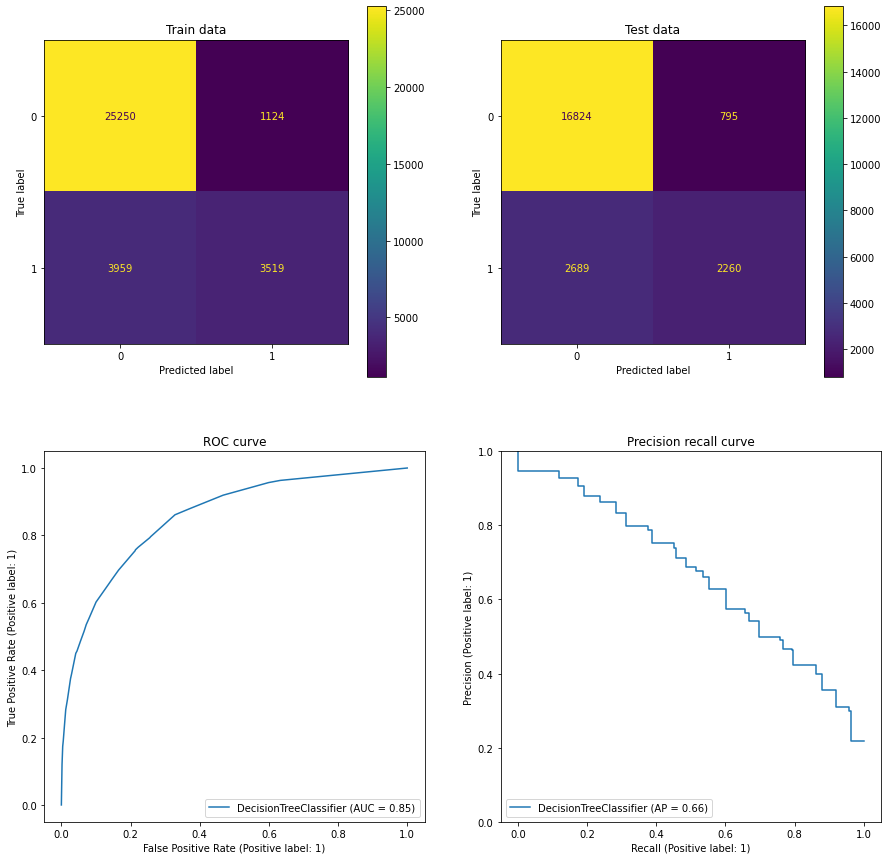

In [82]:
print_metrics_raw(Tree_raw)
plot_scores_raw(Tree_raw)

Accuracy score (train): 0.8433049506442619
Accuracy score (test): 0.8422807414104883
Tree depth: 5
Leaf count: 32


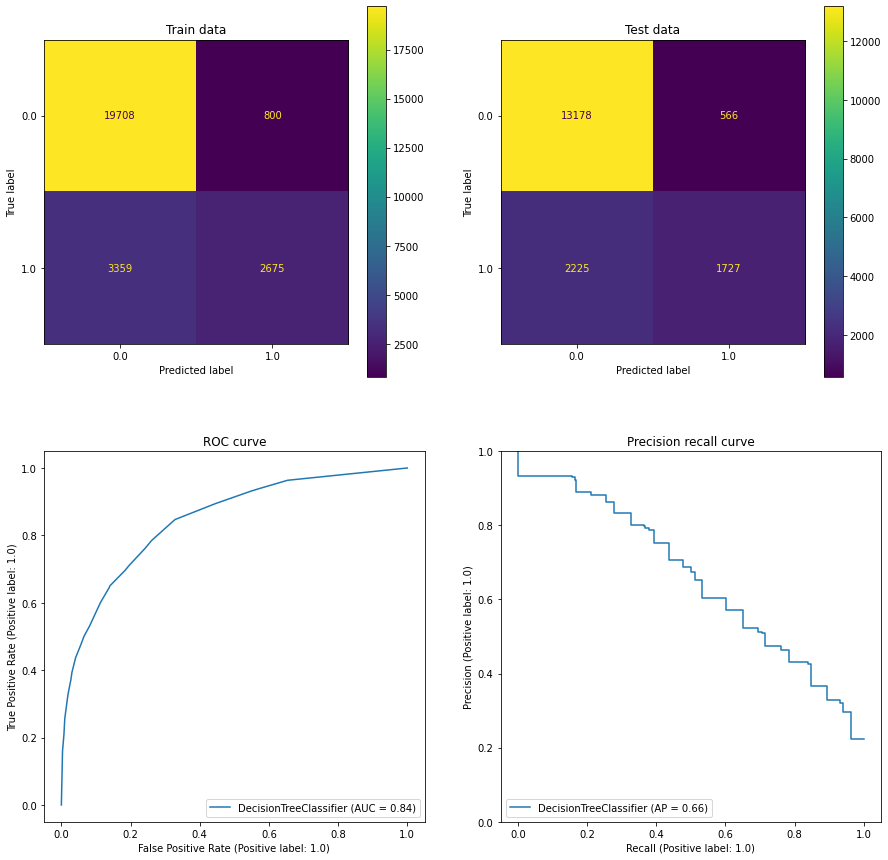

In [84]:
#Praktycznie ta sama Accuracy :(
print_metrics_prep(Tree_prep)
plot_scores_prep(Tree_prep)

Ok teraz zmieńmy "criterion" z 'gini' na 'entropy'. 

In [85]:
Tree_raw = DecisionTreeClassifier(criterion='entropy', splitter='best',random_state=1337,max_depth = 5)
Tree_prep = DecisionTreeClassifier(criterion='entropy', splitter='best',random_state=1337,max_depth = 5)
Tree_raw.fit(X_train_raw,y_train_raw)
Tree_prep.fit(X_train_prep,y_train_prep)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1337)

Accuracy score (train): 0.8470695970695971
Accuracy score (test): 0.8443814250265863
Tree depth: 5
Leaf count: 32


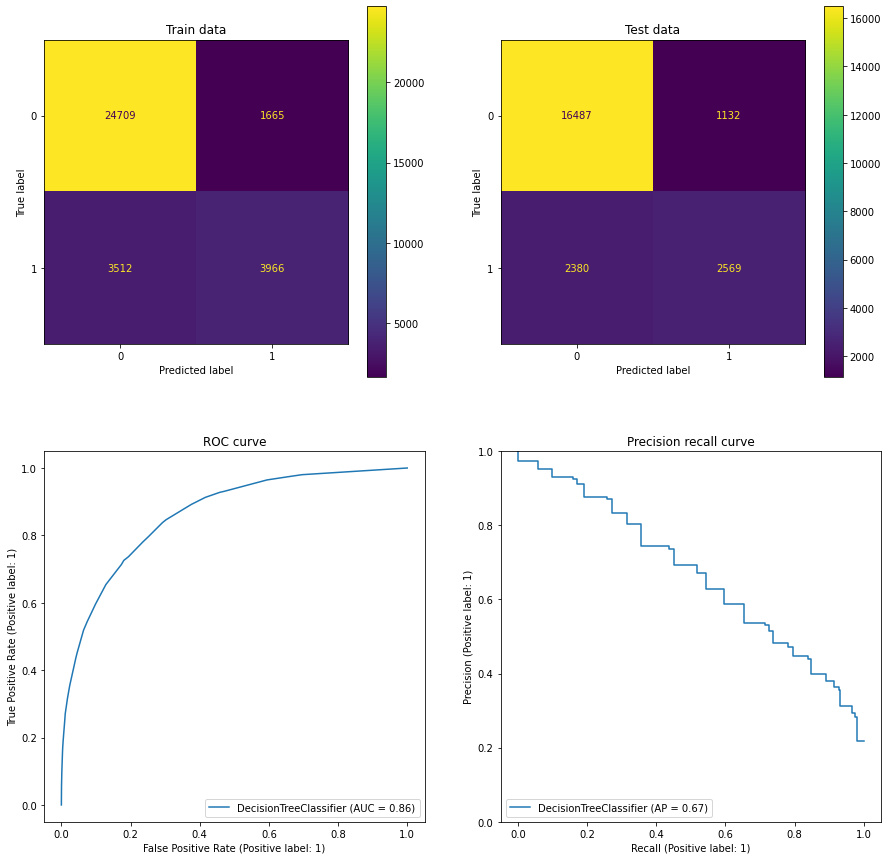

In [86]:
print_metrics_raw(Tree_raw)
plot_scores_raw(Tree_raw)

Accuracy score (train): 0.843380302916133
Accuracy score (test): 0.840754972875226
Tree depth: 5
Leaf count: 32


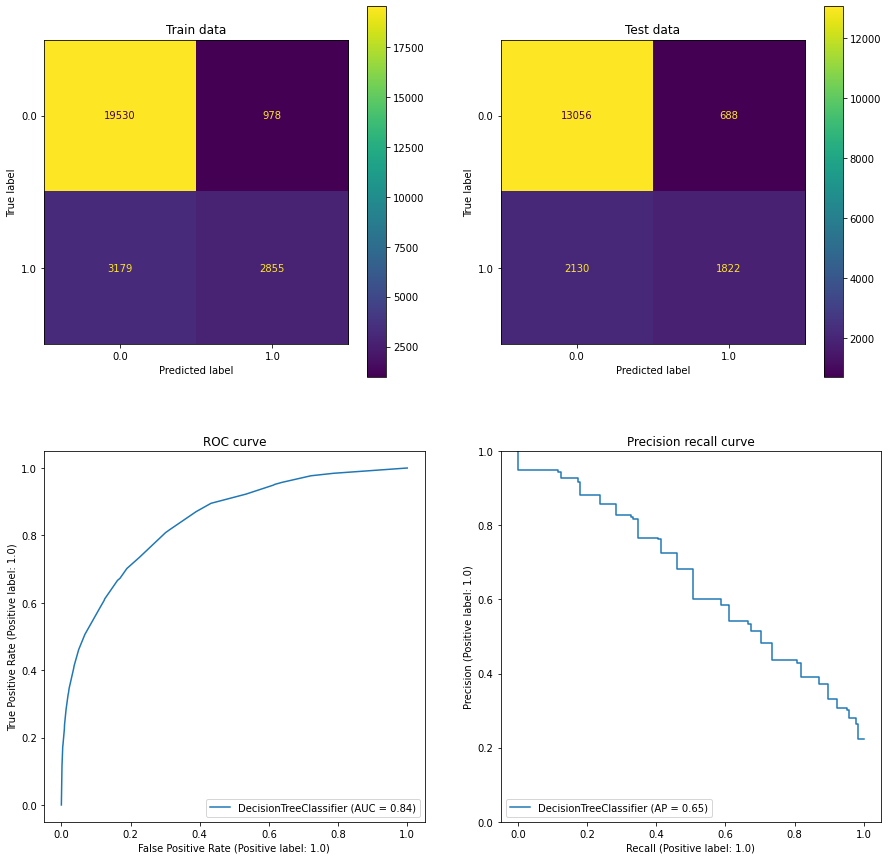

In [87]:
print_metrics_prep(Tree_prep)
plot_scores_prep(Tree_prep)

Widzimy, iż entropia radzi sobie odrobine gorzej niż gini, jednakże accuracy, ROC curve oraz precission recall curve są praktycznie identyczne dla odbydwu przypadków.

## Las losowy
Skoro zaczeliśmy od drzewa, to teraz przejdźmy do lasu, apriori zakładam, iż na "logikę" las powinien zwrócić lepsze wyniki niż pojedyńcze drzewo. Analizowanym parametrem będzie "n_estimators". Ponownie musiałem ustalić maksymalną głębokość, tym razem większą, gdyż powstawało zbyt dużo przeuczonych drzew w lesie.

In [105]:
from sklearn.ensemble import RandomForestClassifier
forest_raw = RandomForestClassifier(n_estimators= 10,max_depth=7)
forest_prep = RandomForestClassifier(n_estimators= 10,max_depth=7)

forest_raw.fit(X_train_raw,y_train_raw)
forest_prep.fit(X_train_prep,y_train_prep)

RandomForestClassifier(max_depth=7, n_estimators=10)

Accuracy score (train): 0.8574087203119461
Accuracy score (test): 0.8494771357674583


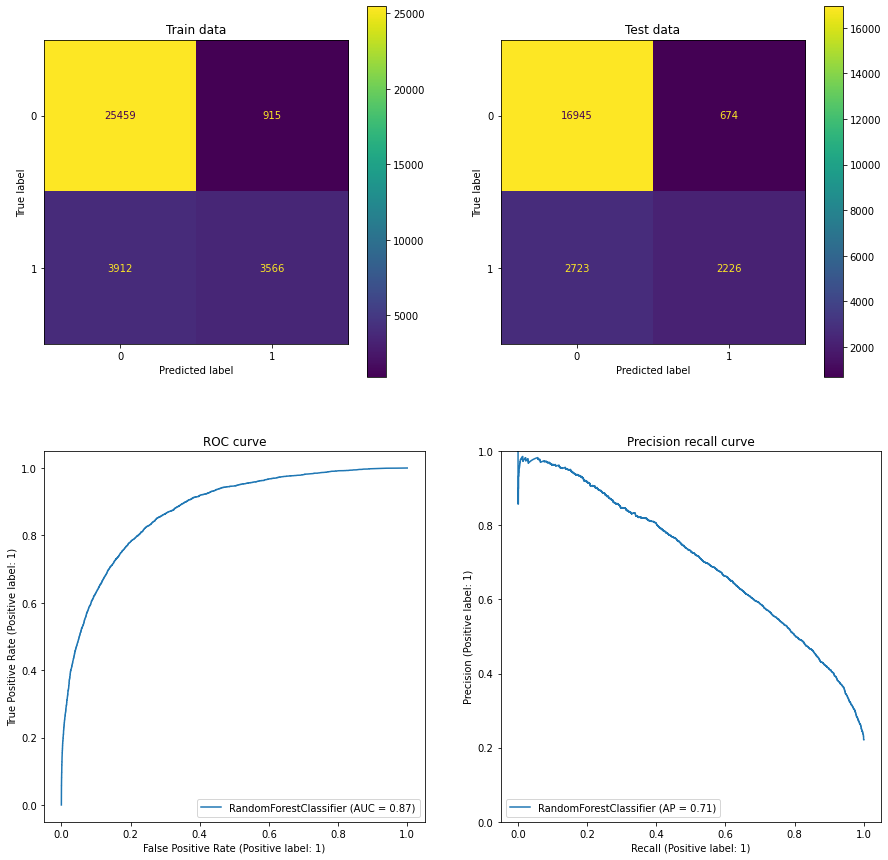

In [106]:
print(f"Accuracy score (train): {forest_raw.score(X_train_raw, y_train_raw)}")
print(f"Accuracy score (test): {forest_raw.score(X_test_raw, y_test_raw)}")
plot_scores_raw(forest_raw)

Accuracy score (train): 0.8558134277748474
Accuracy score (test): 0.8414896021699819


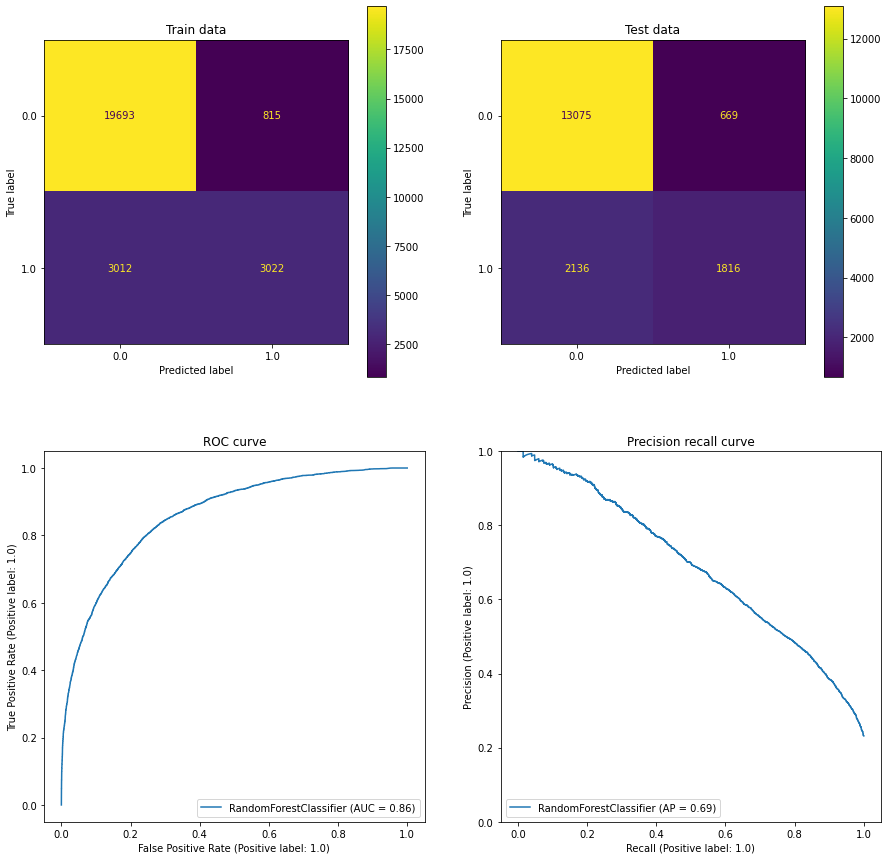

In [107]:
#Ponownie niepokojąca obserwacja zwiększenia Accuracy w zbiorze treningowym i zmniejszenia w testowym
print(f"Accuracy score (train): {forest_prep.score(X_train_prep, y_train_prep)}")
print(f"Accuracy score (test): {forest_prep.score(X_test_prep, y_test_prep)}")
plot_scores_prep(forest_prep)

Dobrze, teraz zmieńmy ilość estymatorów z 10 na 50, większa liczba drzew powinna mieć statystycznie częściej racje, lecz zobaczymy.

In [108]:
forest_raw = RandomForestClassifier(n_estimators= 50,max_depth=7)
forest_prep = RandomForestClassifier(n_estimators= 50,max_depth=7)

forest_raw.fit(X_train_raw,y_train_raw)
forest_prep.fit(X_train_prep,y_train_prep)

RandomForestClassifier(max_depth=7, n_estimators=50)

Accuracy score (train): 0.8618693134822167
Accuracy score (test): 0.8521800779865296


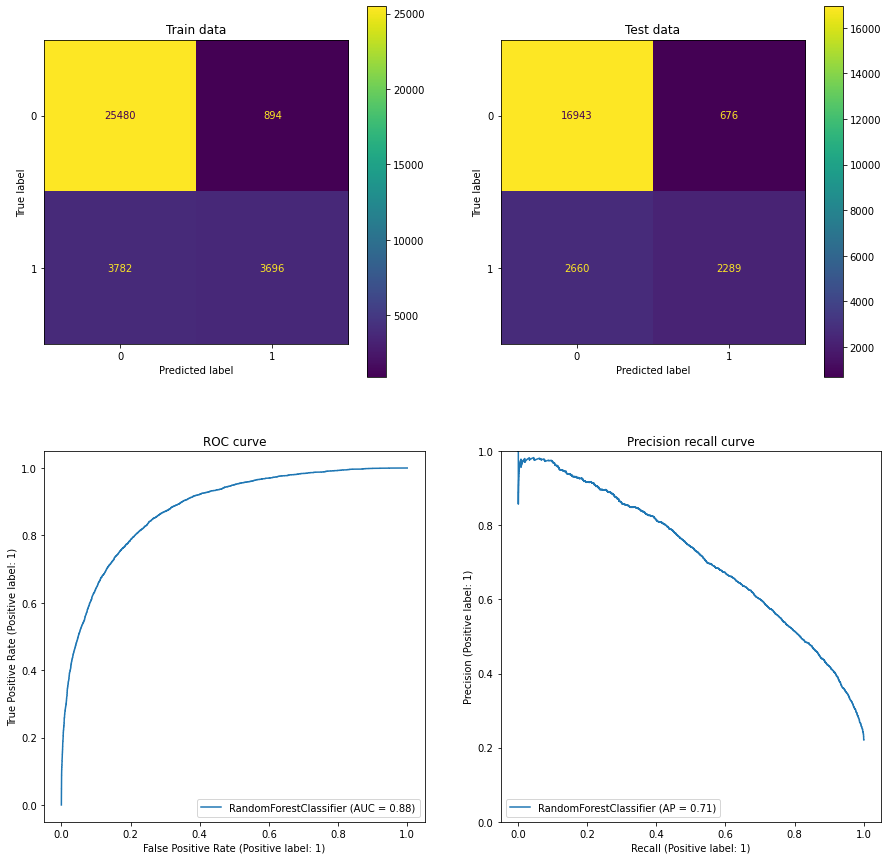

In [109]:
print(f"Accuracy score (train): {forest_raw.score(X_train_raw, y_train_raw)}")
print(f"Accuracy score (test): {forest_raw.score(X_test_raw, y_test_raw)}")
plot_scores_raw(forest_raw)

Accuracy score (train): 0.8596940697762038
Accuracy score (test): 0.844371609403255


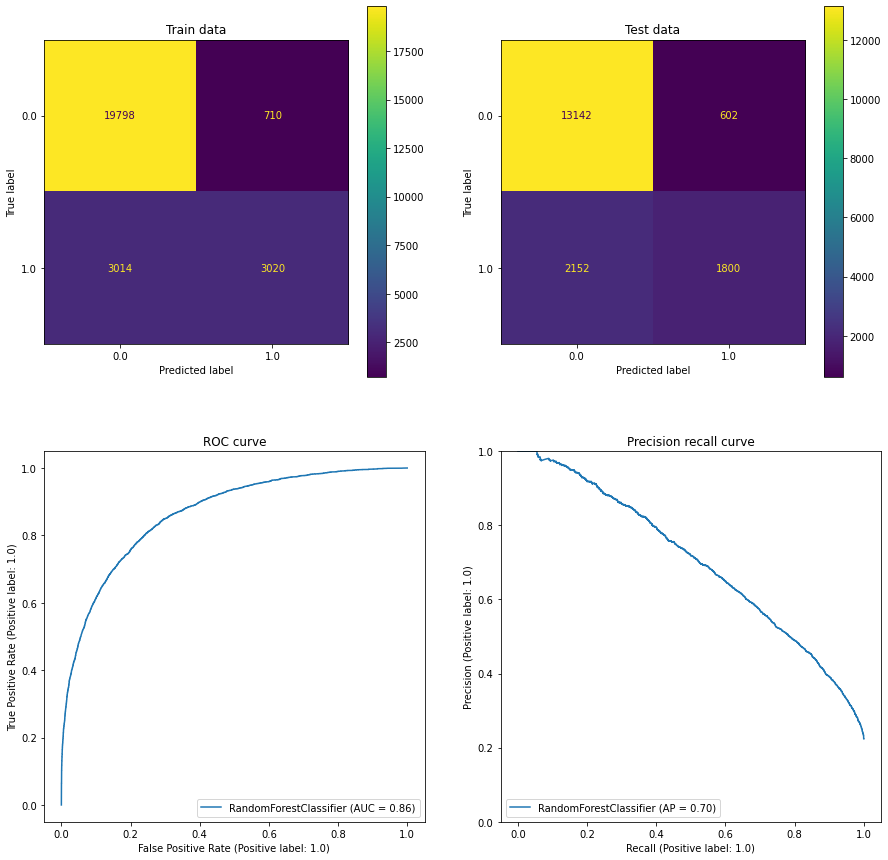

In [110]:
print(f"Accuracy score (train): {forest_prep.score(X_train_prep, y_train_prep)}")
print(f"Accuracy score (test): {forest_prep.score(X_test_prep, y_test_prep)}")
plot_scores_prep(forest_prep)

Jak widzimy, 50 drzew nie wybiera wyników dużo lepiej niż 10, z zatem nie zaprzestańmy na zwiększaniu ilości drzew w lesie i sprawdźmy jeszcze jak poradzą sobie trzy drzewa w komitecie.

In [112]:
forest_raw = RandomForestClassifier(n_estimators= 3,max_depth=7)
forest_prep = RandomForestClassifier(n_estimators= 3,max_depth=7)

forest_raw.fit(X_train_raw,y_train_raw)
forest_prep.fit(X_train_prep,y_train_prep)

RandomForestClassifier(max_depth=7, n_estimators=3)

Accuracy score (train): 0.8548682500295404
Accuracy score (test): 0.8453562566465792


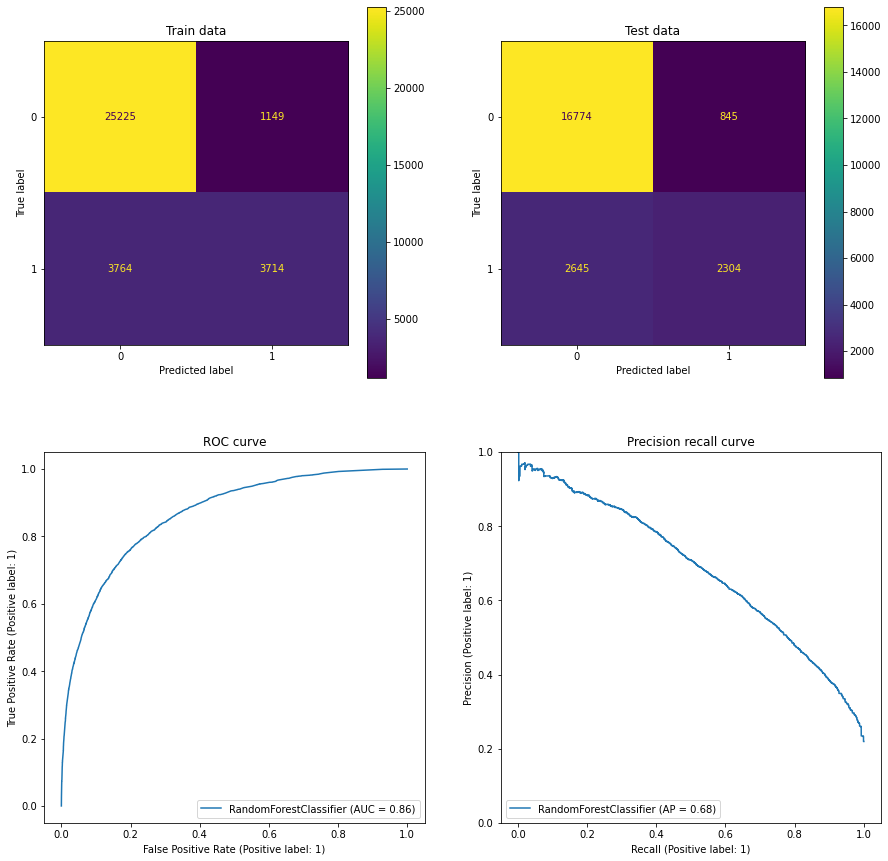

In [113]:
print(f"Accuracy score (train): {forest_raw.score(X_train_raw, y_train_raw)}")
print(f"Accuracy score (test): {forest_raw.score(X_test_raw, y_test_raw)}")
plot_scores_raw(forest_raw)

Accuracy score (train): 0.8519704619094266
Accuracy score (test): 0.8386075949367089


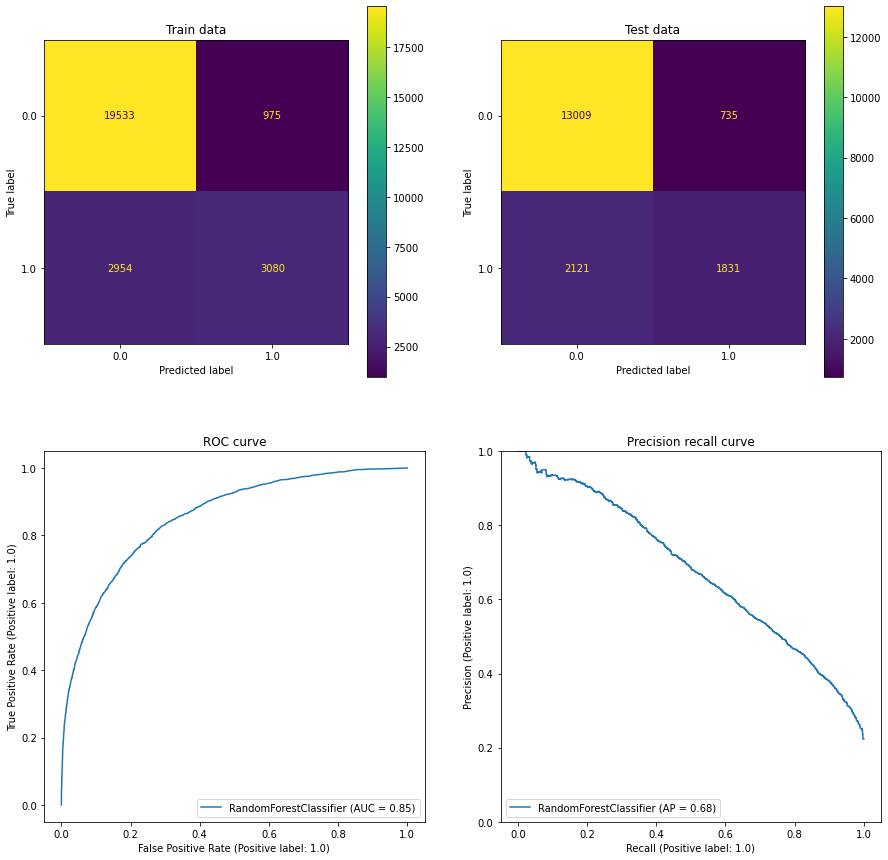

In [114]:
print(f"Accuracy score (train): {forest_prep.score(X_train_prep, y_train_prep)}")
print(f"Accuracy score (test): {forest_prep.score(X_test_prep, y_test_prep)}")
plot_scores_prep(forest_prep)

Konkluzje? Pojedyńcze drzewo wybiera wynik dostatecznie precyzyjnie by na własną ręke stwierdzić wynik z dużym prawdopodobieństwem, a zatem większa ilość drzew w komitecie nie poprawi tego wyniku znacząco.

## Logistic regression
Jako ostatni klasyfikator wykorzystam regresję logistyczną, coś niezwiązanego z drzewami, jako parametr wybrałem "solver", gdyż jest on najbardziej newralgiczny w podejmowaniu decyzji.

In [115]:
from sklearn.linear_model import LogisticRegression
#Domyślny parametr lbfgs
regression_raw = LogisticRegression(random_state=1, solver ='lbfgs')
regression_prep = LogisticRegression(random_state=1, solver ='lbfgs')

regression_raw.fit(X_train_raw,y_train_raw)
regression_prep.fit(X_train_prep,y_train_prep)

LogisticRegression(random_state=1)

Accuracy score (train): 0.8511757060144157
Accuracy score (test): 0.8524459411556186


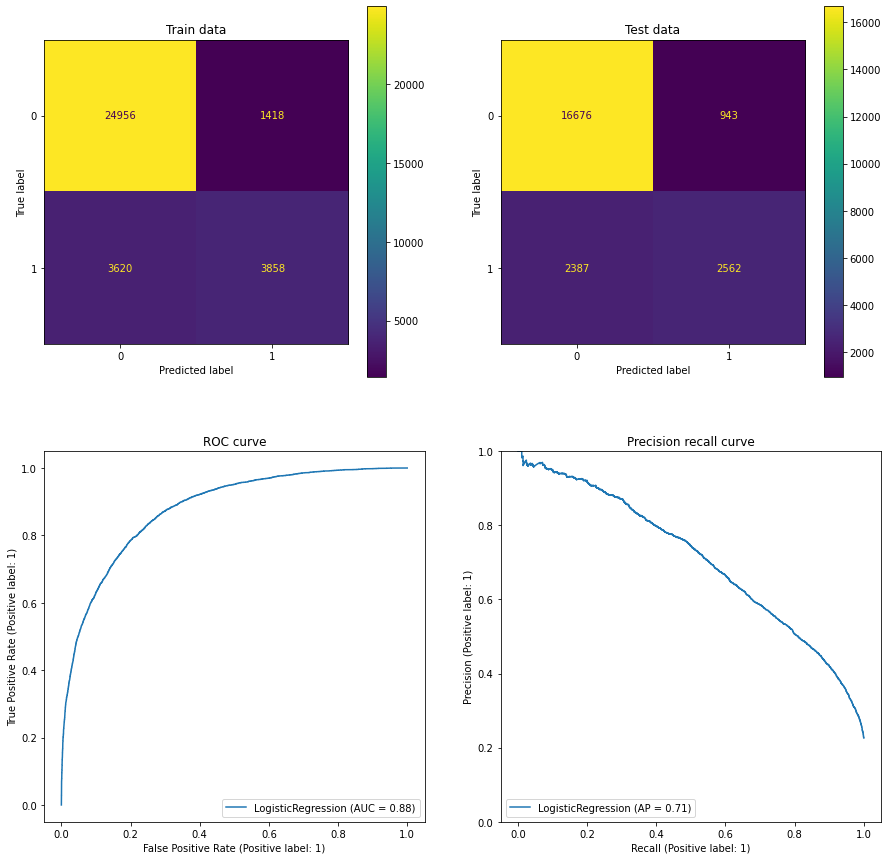

In [118]:
print(f"Accuracy score (train): {regression_raw.score(X_train_raw, y_train_raw)}")
print(f"Accuracy score (test): {regression_raw.score(X_test_raw, y_test_raw)}")
plot_scores_raw(regression_raw)

Accuracy score (train): 0.8520458141812975
Accuracy score (test): 0.846123417721519


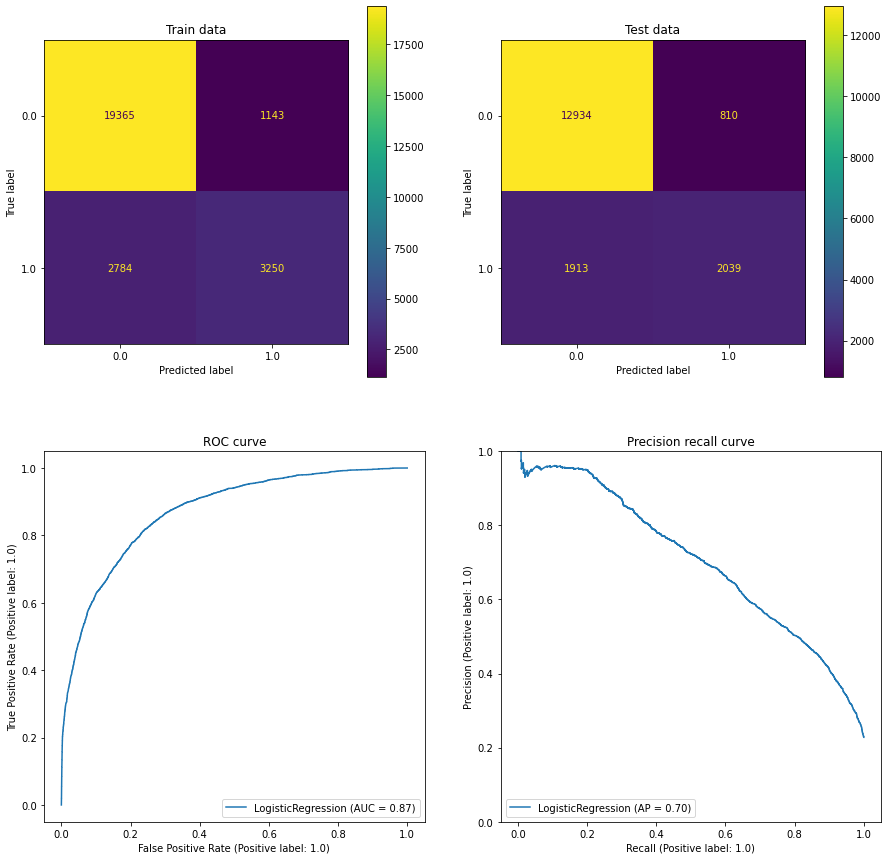

In [121]:
print(f"Accuracy score (train): {regression_prep.score(X_train_prep, y_train_prep)}")
print(f"Accuracy score (test): {regression_prep.score(X_test_prep, y_test_prep)}")
plot_scores_prep(regression_prep)

Accuracy score (train): 0.8518551341131986
Accuracy score (test): 0.8530662885501595
Accuracy score (train): 0.8517820812297491
Accuracy score (test): 0.8460103978300181


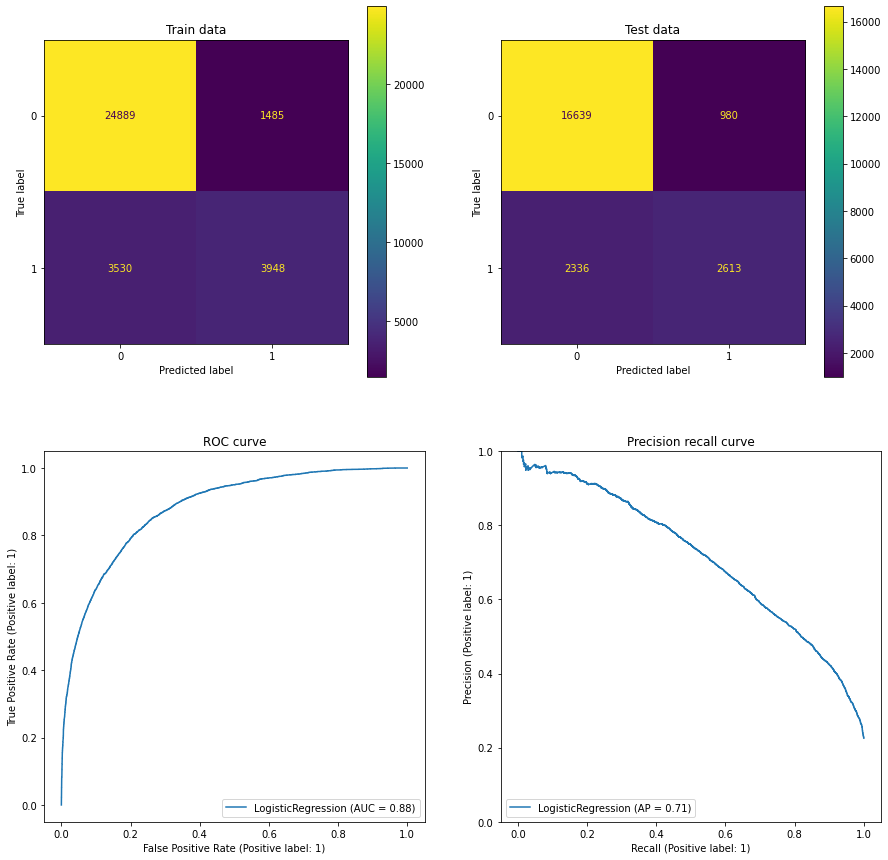

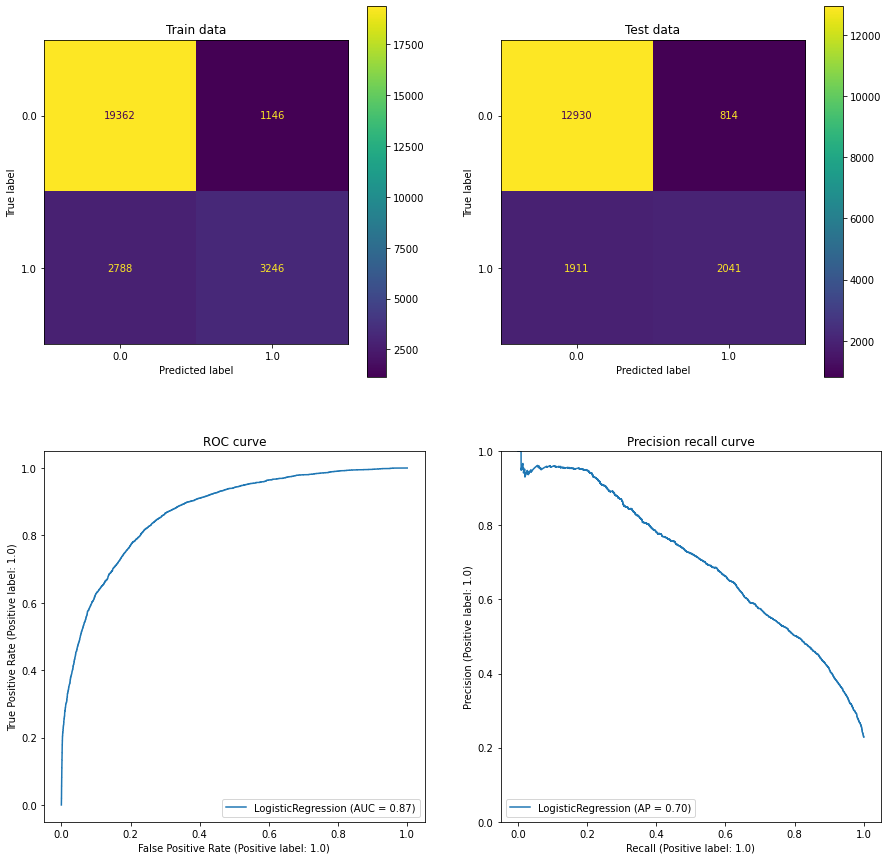

In [124]:
#Liblinear jest dobry dla niewielkich ramek danych, więc powinien sprawować się gorzej
regression_raw = LogisticRegression(random_state=1, solver ='liblinear')
regression_prep = LogisticRegression(random_state=1, solver ='liblinear')

regression_raw.fit(X_train_raw,y_train_raw)
regression_prep.fit(X_train_prep,y_train_prep)

print(f"Accuracy score (train): {regression_raw.score(X_train_raw, y_train_raw)}")
print(f"Accuracy score (test): {regression_raw.score(X_test_raw, y_test_raw)}")
plot_scores_raw(regression_raw)
print(f"Accuracy score (train): {regression_prep.score(X_train_prep, y_train_prep)}")
print(f"Accuracy score (test): {regression_prep.score(X_test_prep, y_test_prep)}")
plot_scores_prep(regression_prep)

Jednak różnice są niewielkie :(

Accuracy score (train): 0.8515892709441096
Accuracy score (test): 0.8534207727756115
Accuracy score (train): 0.852008138045362
Accuracy score (test): 0.8459538878842676


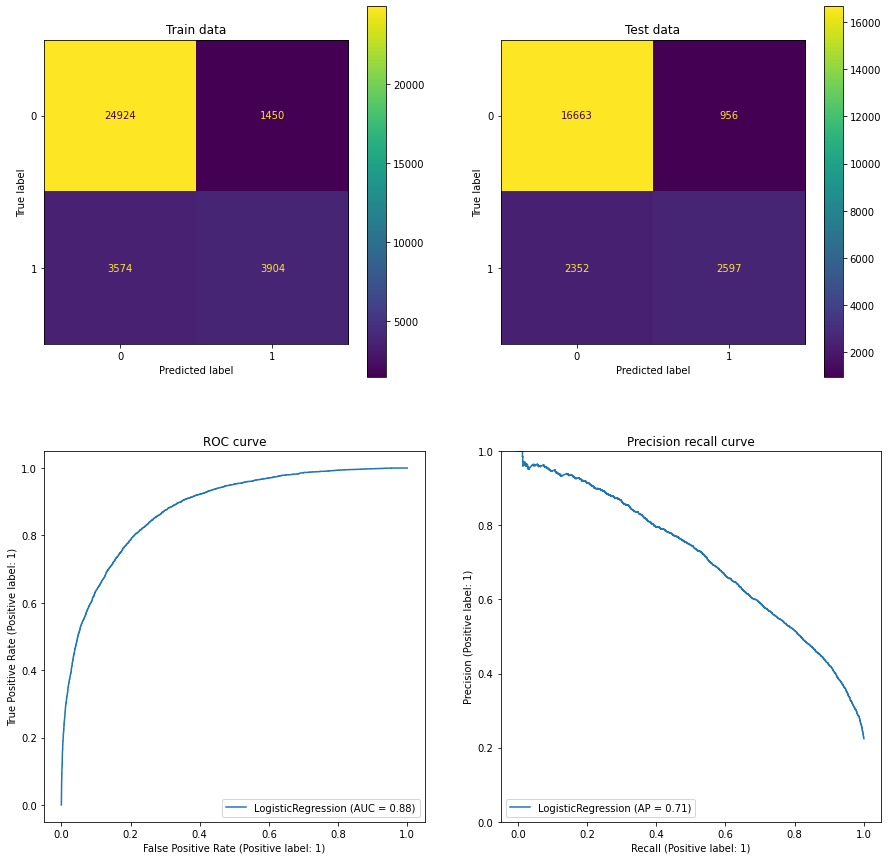

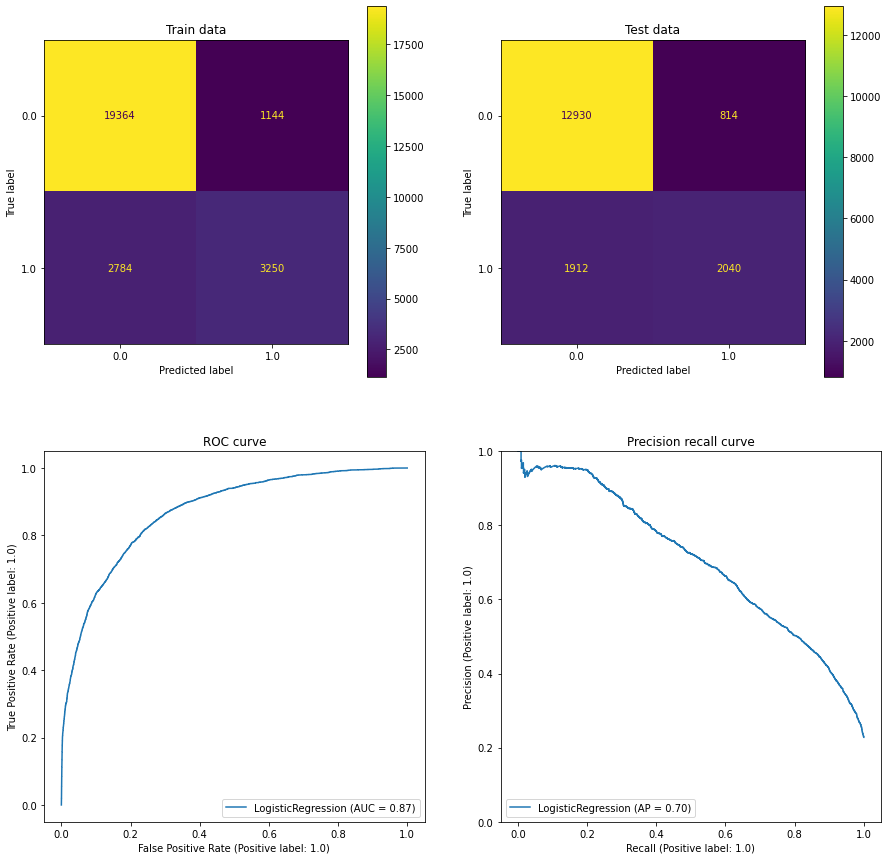

In [125]:
#Sag oraz saga są podobnymi parametrami, stosowanymi dla dużych ramek, więc dla skrócenia raportu, użyje wyłącznie sag
regression_raw = LogisticRegression(random_state=1, solver ='sag')
regression_prep = LogisticRegression(random_state=1, solver ='sag')

regression_raw.fit(X_train_raw,y_train_raw)
regression_prep.fit(X_train_prep,y_train_prep)

print(f"Accuracy score (train): {regression_raw.score(X_train_raw, y_train_raw)}")
print(f"Accuracy score (test): {regression_raw.score(X_test_raw, y_test_raw)}")
plot_scores_raw(regression_raw)
print(f"Accuracy score (train): {regression_prep.score(X_train_prep, y_train_prep)}")
print(f"Accuracy score (test): {regression_prep.score(X_test_prep, y_test_prep)}")
plot_scores_prep(regression_prep)

Accuracy score (train): 0.8539524991137895
Accuracy score (test): 0.8533321517192485
Accuracy score (train): 0.8520458141812975
Accuracy score (test): 0.8460103978300181


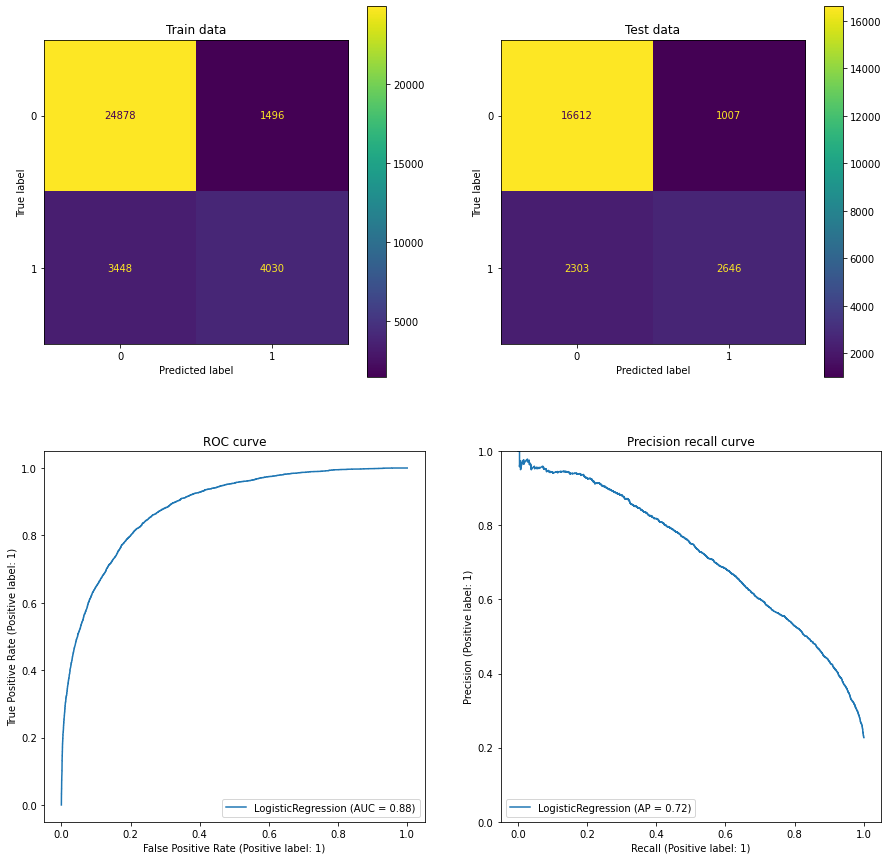

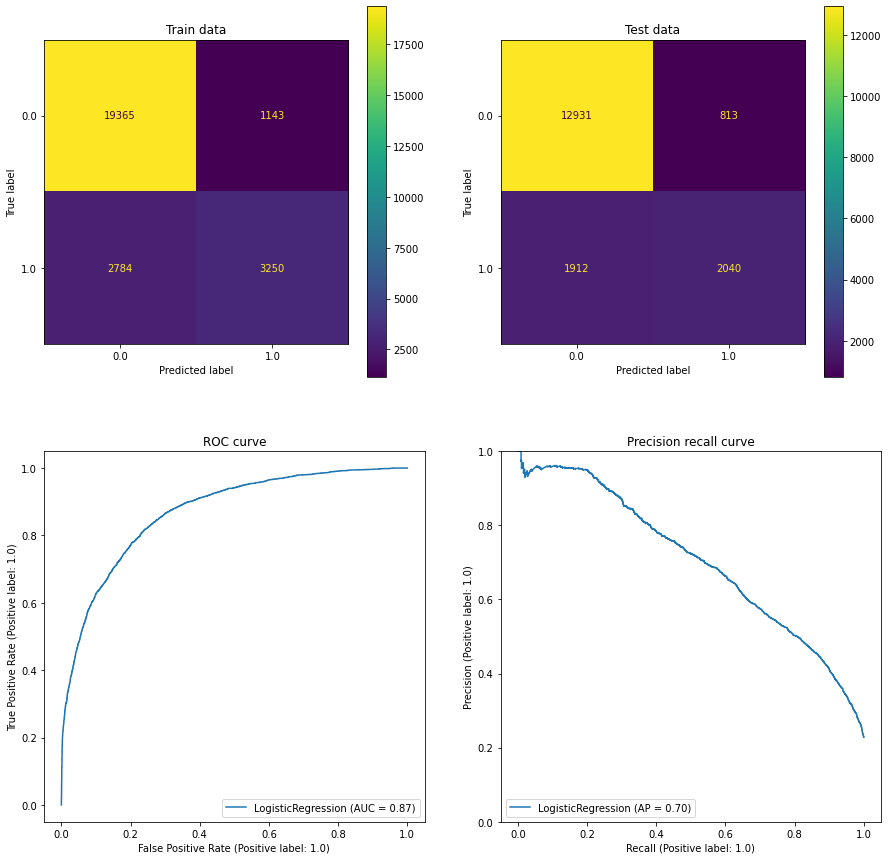

In [126]:
#Pozostał nam wyłącznie do sprawdzenia newton-cg, może tym razem różnica będzie zauważalna?
regression_raw = LogisticRegression(random_state=1, solver ='newton-cg')
regression_prep = LogisticRegression(random_state=1, solver ='newton-cg')

regression_raw.fit(X_train_raw,y_train_raw)
regression_prep.fit(X_train_prep,y_train_prep)

print(f"Accuracy score (train): {regression_raw.score(X_train_raw, y_train_raw)}")
print(f"Accuracy score (test): {regression_raw.score(X_test_raw, y_test_raw)}")
plot_scores_raw(regression_raw)
print(f"Accuracy score (train): {regression_prep.score(X_train_prep, y_train_prep)}")
print(f"Accuracy score (test): {regression_prep.score(X_test_prep, y_test_prep)}")
plot_scores_prep(regression_prep)

## Finalne konkluzje

Z przykrością muszę stwierdzić, iż preprocessing nie zmienił dużo (i to niestety na gorsze), więc czasami, jak zobaczyłem, większa ilość danych bez usuwania outlierów, daje lepsze wyniki. W moim przypadku zostało usunięte około 20% danych, jak widać za dużo, przy w miare średniej wielkości ramce danych z sporawą ilością parametrów (kolumn).  
W kwestii funkcjonalności klasyfikatorów, okazały się być niezwykle ze sobą zgodne i średni wynik accuracy wyniósł 85%, czyli dość porządnie.  
W kwestii wyboru miary oceny, zawszę (w projektach, w pracach domowych) stosowałem accuracy jako wiodący wyznacznik gdyż pozakuje nam jak bardzo "świadomie" model stwierdził podany wynik, co jest, dla mnie, najlepszą miarą wskazania jego poprawności, chociaż mogę być odrobinę stronniczy.